In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
# view the data
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.shape

(4024, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [6]:
df.corr()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


In [7]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [8]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [9]:
df.select_dtypes(include='object').columns

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')

In [10]:
df.select_dtypes(exclude='object').columns

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')

In [11]:
df['Status'] = df['Status'].replace({'Alive':1 ,'Dead': 0})

In [12]:
df = df.drop('Marital Status', axis=1)

In [13]:
df.head().T

,0,1,2,3,4
Age,68,50,58,58,47
Race,White,White,White,White,White
T Stage,T1,T2,T3,T1,T2
N Stage,N1,N2,N3,N1,N1
6th Stage,IIA,IIIA,IIIC,IIA,IIB
differentiate,Poorly differentiated,Moderately differentiated,Moderately differentiated,Poorly differentiated,Poorly differentiated
Grade,3,2,2,3,3
A Stage,Regional,Regional,Regional,Regional,Regional
Tumor Size,4,35,63,18,41
Estrogen Status,Positive,Positive,Positive,Positive,Positive


In [14]:
target = df['Status']

dummie_col = [
    'Race', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage','Estrogen Status',
       'Progesterone Status' 
]

In [15]:
df = pd.get_dummies(df, columns= dummie_col)

In [16]:
drop_col = [
    'Regional Node Examined', 'Reginol Node Positive','Status'
]
df = df.drop(drop_col, axis=1)

In [17]:
df.head().T

,0,1,2,3,4
Age,68,50,58,58,47
Tumor Size,4,35,63,18,41
Survival Months,60,62,75,84,50
Race_Black,0,0,0,0,0
Race_Other,0,0,0,0,0
Race_White,1,1,1,1,1
T Stage _T1,1,0,0,1,0
T Stage _T2,0,1,0,0,1
T Stage _T3,0,0,1,0,0
T Stage _T4,0,0,0,0,0


In [18]:
scaling_columns = [
    'Age', 'Tumor Size','Survival Months'
]

for column in scaling_columns:
    df[column] = (df[column] - df[column].mean())/df[column].std()
df.head().T

,0,1,2,3,4
Age,1.565059,-0.443167,0.449378,0.449378,-0.777872
Tumor Size,-1.253506,0.214319,1.540095,-0.590617,0.498414
Survival Months,-0.492900,-0.405645,0.161510,0.554156,-0.929173
Race_Black,0.000000,0.000000,0.000000,0.000000,0.000000
Race_Other,0.000000,0.000000,0.000000,0.000000,0.000000
Race_White,1.000000,1.000000,1.000000,1.000000,1.000000
T Stage _T1,1.000000,0.000000,0.000000,1.000000,0.000000
T Stage _T2,0.000000,1.000000,0.000000,0.000000,1.000000
T Stage _T3,0.000000,0.000000,1.000000,0.000000,0.000000
T Stage _T4,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, target,
    test_size=0.3, shuffle=True, random_state=42  
)
X_train.head()

,Age,Tumor Size,Survival Months,Race_Black,Race_Other,Race_White,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
3841,0.895650,-0.685316,-0.187508,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1511,0.114673,0.924556,-0.798291,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
1717,-0.554735,-0.495919,-0.667409,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
226,0.560946,1.256000,-0.492900,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
2872,1.118786,2.487078,-1.583582,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
knn.score(X_train_scaled,y_train)

0.9112215909090909

In [23]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg.score(X_train_scaled,y_train)

0.8934659090909091

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
dt.score(X_train_scaled,y_train)

0.9996448863636364

In [25]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1000)
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled,y_train)

0.8902698863636364

In [26]:
# Make predictions
y_preds = dt.predict(X_test_scaled)
y_preds[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [27]:
# Make predictions with probabilities
y_probs = dt.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]]),
 1208)

In [28]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1.])

In [29]:
# Caculate fpr, tpr and thresholds
from sklearn.metrics import roc_curve

fpr, tpr, thresholds_ = roc_curve(y_test, y_probs_positive, pos_label=1)

# Check the false positive rates
fpr

array([0.  , 0.68, 1.  ])

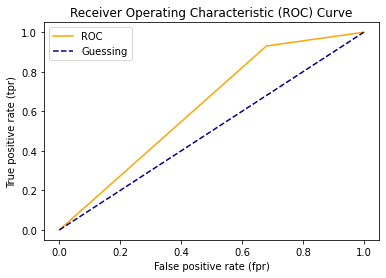

In [30]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       175
           1       0.93      0.91      0.92      1033

    accuracy                           0.87      1208
   macro avg       0.73      0.75      0.74      1208
weighted avg       0.87      0.87      0.87      1208



In [32]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_preds)

0.8667218543046358

In [33]:
confusion_matrix(y_test, y_preds)

array([[104,  71],
       [ 90, 943]], dtype=int64)

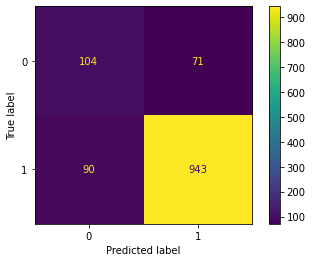

In [34]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

In [35]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,104,71
1,90,943


In [36]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = DecisionTreeClassifier().fit(X_train_scaled, y_train)
    print(f"Model accuracy on test set: {dt.score(X_test_scaled, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 20 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 30 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 40 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 50 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 60 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 70 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 80 estimators...
Model accuracy on test set: 86.67218543046357%

Trying model with 90 estimators...
Model accuracy on test set: 86.67218543046357%



In [37]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    dt.fit(X_train_scaled, y_train)
    print(f"Model accuracy on test set: {dt.score(X_test_scaled, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(dt, X_train_scaled,y_train, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.67218543046357%
Cross-validation score: 82.45751609286623%

Trying model with 20 estimators...
Model accuracy on test set: 85.59602649006622%
Cross-validation score: 81.99570436995327%

Trying model with 30 estimators...
Model accuracy on test set: 86.25827814569537%
Cross-validation score: 82.38653112127281%

Trying model with 40 estimators...
Model accuracy on test set: 86.42384105960265%
Cross-validation score: 82.27995918521597%

Trying model with 50 estimators...
Model accuracy on test set: 86.09271523178808%
Cross-validation score: 82.42205509995844%

Trying model with 60 estimators...
Model accuracy on test set: 86.17549668874173%
Cross-validation score: 82.49304007155185%

Trying model with 70 estimators...
Model accuracy on test set: 86.42384105960265%
Cross-validation score: 81.88913243389642%

Trying model with 80 estimators...
Model accuracy on test set: 86.58940397350993%
Cross-validation score: 82.315483163

In [38]:
print(f"Model accuracy on test set: {dt.score(X_test, y_test) * 100:.2f}%")

Model accuracy on test set: 84.19%
